**Probability to Win Model**

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
import statsmodels.formula.api as smf
plt.style.use('ggplot') # This styles the graphs in a nicer format

In [7]:
UFC = pd.read_csv('Data/2a) UFC Fights.csv')

#make sure theres no space in the columns
UFC.columns = [c.replace(' ', '_') for c in UFC.columns]

#change outcome win = 1, everything else 0
UFC['OUTCOME1'] = UFC.OUTCOME.map({'win':1, 'loss':0, 'draw':0, 'NC':0})

#change stance and stance_diff into 1,0
#lets just put orthodox as 1, other as 0
UFC['STANCE1'] = UFC.STANCE.map({'Orthodox':1, 'Southpaw':0, 'Switch':0, 'Open Stance':0,'Sideways':0})
#same stance = 0
UFC['STANCE_DIFF1'] = UFC.STANCE_DIFF.map({'Same Stance':0, 'Different Stance':1})

#Try using more stance information
# create a DataFrame with the four dummy variable columns
STANCE_dummies = pd.get_dummies(UFC.STANCE, prefix='STANCE').iloc[:, 1:]
#STANCE_dummies
UFC = pd.concat([UFC, STANCE_dummies], axis=1)

#Stance information works well, but it looksl ike southpaw is a great advantage. Group observations into southpaw = 1
#Other = 0
UFC['STANCE2'] = UFC.STANCE.map({'Orthodox':0, 'Southpaw':1, 'Switch':0, 'Open Stance':0,'Sideways':0})

In [8]:
#Add Business Filters
#Exclude fights where it is single round only
UFC1=UFC[(UFC.ROUND_FORMAT == 'MULTI-ROUND')]

#see how many fights are there for each weight class
#print UFC1.WEIGHT_CLASS.value_counts()

#from initial investigation we will exclude Women's classes, Catch Weight and Super Heavyweight
UFC1=UFC[(UFC.ROUND_FORMAT == 'MULTI-ROUND')&(-UFC.WEIGHT_CLASS.isin(['Super Heavyweight','Catch Weight','Womens Bantamweight','Womens Strawweight']))&(UFC.WEIGHT_CLASS.notnull())]
print UFC1.WEIGHT_CLASS.value_counts()

Lightweight          1434
Welterweight         1400
Middleweight         1094
Light Heavyweight     726
Heavyweight           676
Featherweight         546
Bantamweight          434
Flyweight             212
Name: WEIGHT_CLASS, dtype: int64


FIGHT_ORDER                  0
KEY                          0
ROUND_FORMAT                 0
EVENT_TYPE                   0
EVENT_NAME                   0
EVENT_YEAR                   0
EVENT_MONTH                  0
EVENT_DAY                    0
LOCATION_COUNTRY             0
LOCATION_CITY                0
VENUE                        0
ATTENDANCE                 280
MAIN_FIGHT                   0
MID                          0
WEIGHT_CLASS                 0
REF                        618
METHOD                       0
METHOD_D                    22
ROUND                        0
FINISH_ROUND_MIN             0
FINISH_ROUND_SEC             0
FINISH_ROUND_INSECONDS       0
TOTAL_INSECONDS              0
FIGHTER_NAME                 0
FIGHER_NO                    0
OUTCOME                      0
FIGHTER_ID                   0
STR                          0
TD                           0
SUB                          0
                          ... 
REACH_INCH1                 23
STANCE  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             REACH_INCH   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                 1.678e+04
Date:                Sun, 15 May 2016   Prob (F-statistic):               0.00
Time:                        12:48:18   Log-Likelihood:                -11945.
No. Observations:                5880   AIC:                         2.389e+04
Df Residuals:                    5878   BIC:                         2.391e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4766      0.550      2.683      0.007         0.398     2.555
HEIGHT_CM      0.3957      0.003    129.555      0.000         0.390     0.402
==============================================================================
Omnibus:                       73.880   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.517
Skew:                           0.260   Prob(JB):                     1.47e-17
Kurtosis:                       3.213   Cond. No.                     4.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

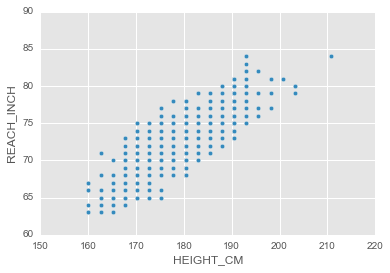

In [9]:
#check out missing values
print UFC1.isnull().sum()

#fill in missing reach values
UFC1.plot(kind='scatter', x='HEIGHT_CM', y='REACH_INCH')
# create a fitted model in one line
lm = smf.ols(formula='REACH_INCH ~ HEIGHT_CM', data=UFC1).fit()
# print the coefficients
lm.params
lm.summary()

(5942, 13)


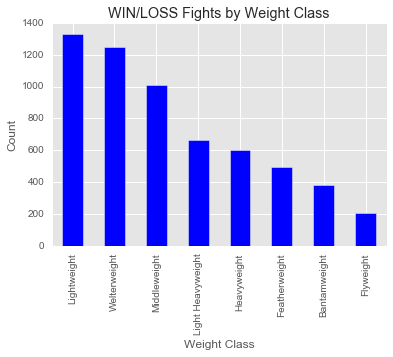

In [10]:
#drop everything except the variables we want keep - building only a Diff Model
#UFC1b = UFC1.drop('NICK', 1)
UFC1b = UFC1.iloc[:,[14,50,51,52,54,55,56,57,58,59,61,62,64]]

#using reach_diff1 variable instead, which used the linear regression to infer missing reach based on height
UFC1b = UFC1b.dropna()
print UFC1b.shape

# bar plot of number of countries in each continent
UFC1b.WEIGHT_CLASS.value_counts().plot(kind='bar', title='WIN/LOSS Fights by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.show()                                  # show plot window (if it doesn't automatically appear)

          AGE_DIFF  HEIGHT_DIFF  WEIGHT_DIFF     EXP_DIFF  \
count  1084.000000  1084.000000  1084.000000  1084.000000   
mean      0.000000     0.000000     0.000000     0.000000   
std       4.871194     6.567329     4.891592     4.376762   
min     -15.000000   -20.320000   -36.287360   -17.000000   
25%      -3.000000    -5.080000     0.000000    -2.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       3.000000     5.080000     0.000000     2.000000   
max      15.000000    20.320000    36.287360    17.000000   

       STRAVG_AT_FIGHT_DIFF  TDAVG_AT_FIGHT_DIFF  SUBAVG_AT_FIGHT_DIFF  \
count           1084.000000          1084.000000           1084.000000   
mean               0.000000             0.000000              0.000000   
std               27.392841             1.713128              0.865646   
min             -102.666667           -10.000000             -4.500000   
25%              -17.000000            -0.744643             -0.353409   
50%   

,AGE_DIFF,HEIGHT_DIFF,WEIGHT_DIFF,EXP_DIFF,STRAVG_AT_FIGHT_DIFF,TDAVG_AT_FIGHT_DIFF,SUBAVG_AT_FIGHT_DIFF,PASSAVG_AT_FIGHT_DIFF,WINRATIO_DIFF,REACH_DIFF1,OUTCOME1,STANCE_DIFF1
AGE_DIFF,1.000000,-0.136655,-0.200732,0.208665,-0.099983,-0.055546,-0.036877,0.001768,-0.104795,-0.149241,-0.183845,0.000000
HEIGHT_DIFF,-0.136655,1.000000,0.318240,0.031659,-0.130150,-0.076614,0.120490,0.105656,-0.059427,0.642535,-0.089983,0.000000
WEIGHT_DIFF,-0.200732,0.318240,1.000000,0.074730,-0.015872,0.027253,0.145657,0.027551,0.112456,0.292425,0.096741,0.000000
EXP_DIFF,0.208665,0.031659,0.074730,1.000000,0.177297,0.068730,0.192940,0.124627,0.126081,0.102305,0.044720,0.000000
STRAVG_AT_FIGHT_DIFF,-0.099983,-0.130150,-0.015872,0.177297,1.000000,0.220352,0.041446,0.164180,0.438908,-0.050126,0.123024,0.000000
TDAVG_AT_FIGHT_DIFF,-0.055546,-0.076614,0.027253,0.068730,0.220352,1.000000,0.168668,0.649573,0.301336,-0.109065,0.074579,0.000000
SUBAVG_AT_FIGHT_DIFF,-0.036877,0.120490,0.145657,0.192940,0.041446,0.168668,1.000000,0.331372,0.197567,0.137695,0.007636,0.000000
PASSAVG_AT_FIGHT_DIFF,0.001768,0.105656,0.027551,0.124627,0.164180,0.649573,0.331372,1.000000,0.328840,0.057731,0.034018,0.000000
WINRATIO_DIFF,-0.104795,-0.059427,0.112456,0.126081,0.438908,0.301336,0.197567,0.328840,1.000000,0.005606,0.104571,0.000000
REACH_DIFF1,-0.149241,0.642535,0.292425,0.102305,-0.050126,-0.109065,0.137695,0.057731,0.005606,1.000000,-0.007777,0.000000


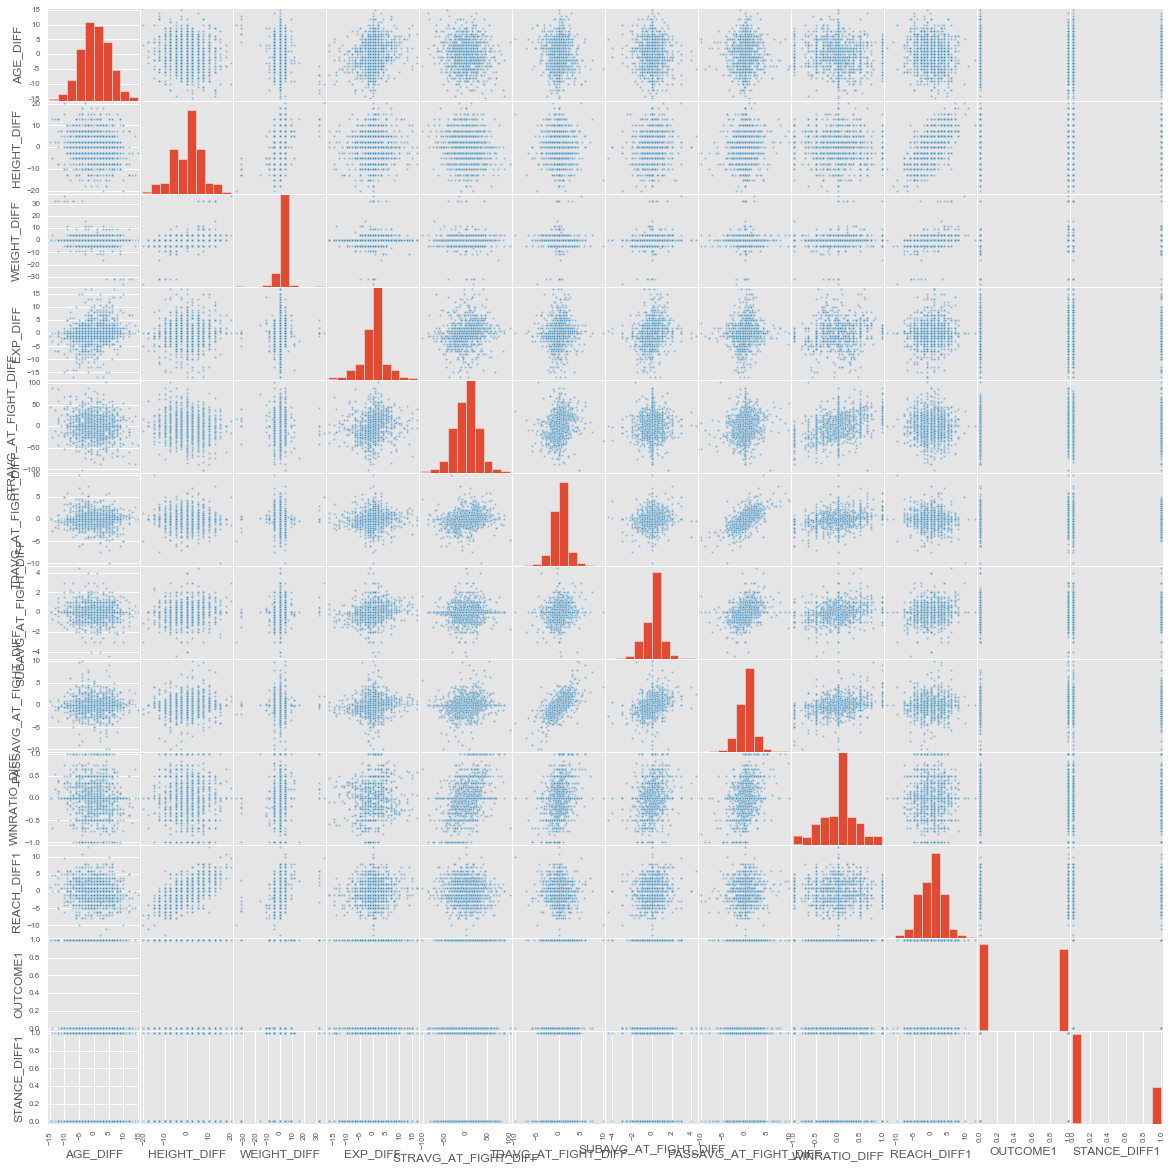

In [57]:
# "LIGHT" Weightclasses
CORRSUB = UFC1b[(UFC1b.WEIGHT_CLASS.isin(['Flyweight','Bantamweight','Featherweight']))]
print CORRSUB.describe()
pd.scatter_matrix(CORRSUB, figsize=(20,20))
print CORRSUB.corr().OUTCOME1
CORRSUB.corr()

          AGE_DIFF  HEIGHT_DIFF  WEIGHT_DIFF     EXP_DIFF  \
count  2576.000000  2576.000000  2576.000000  2576.000000   
mean      0.000000     0.000000     0.000000     0.000000   
std       4.871953     6.329499     4.069242     5.368083   
min     -15.000000   -22.860000   -22.679600   -21.000000   
25%      -3.000000    -5.080000     0.000000    -3.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       3.000000     5.080000     0.000000     3.000000   
max      15.000000    22.860000    22.679600    21.000000   

       STRAVG_AT_FIGHT_DIFF  TDAVG_AT_FIGHT_DIFF  SUBAVG_AT_FIGHT_DIFF  \
count           2576.000000          2576.000000           2576.000000   
mean               0.000000             0.000000              0.000000   
std               22.118759             1.807649              1.085991   
min              -85.500000           -10.000000             -8.666667   
25%              -13.512923            -1.000000             -0.500000   
50%   

,AGE_DIFF,HEIGHT_DIFF,WEIGHT_DIFF,EXP_DIFF,STRAVG_AT_FIGHT_DIFF,TDAVG_AT_FIGHT_DIFF,SUBAVG_AT_FIGHT_DIFF,PASSAVG_AT_FIGHT_DIFF,WINRATIO_DIFF,REACH_DIFF1,OUTCOME1,STANCE_DIFF1
AGE_DIFF,1.000000,-0.147016,-0.033462,0.260750,-0.009930,-0.065571,0.006656,-0.015217,-0.037945,-0.155762,-0.140438,0.000000
HEIGHT_DIFF,-0.147016,1.000000,0.386969,-0.087443,0.010503,-0.145554,0.078394,-0.044560,0.068494,0.679277,0.045190,0.000000
WEIGHT_DIFF,-0.033462,0.386969,1.000000,-0.010322,0.075437,-0.021512,0.048920,-0.022824,0.077091,0.287065,0.024326,0.000000
EXP_DIFF,0.260750,-0.087443,-0.010322,1.000000,0.192646,0.182738,0.179259,0.189451,0.244631,-0.060164,0.096353,0.000000
STRAVG_AT_FIGHT_DIFF,-0.009930,0.010503,0.075437,0.192646,1.000000,0.324009,0.056588,0.232281,0.428543,0.010618,0.119415,0.000000
TDAVG_AT_FIGHT_DIFF,-0.065571,-0.145554,-0.021512,0.182738,0.324009,1.000000,0.227880,0.664698,0.399102,-0.073950,0.186345,0.000000
SUBAVG_AT_FIGHT_DIFF,0.006656,0.078394,0.048920,0.179259,0.056588,0.227880,1.000000,0.355964,0.286410,0.089097,0.072964,0.000000
PASSAVG_AT_FIGHT_DIFF,-0.015217,-0.044560,-0.022824,0.189451,0.232281,0.664698,0.355964,1.000000,0.391920,-0.015264,0.149361,0.000000
WINRATIO_DIFF,-0.037945,0.068494,0.077091,0.244631,0.428543,0.399102,0.286410,0.391920,1.000000,0.059820,0.139186,0.000000
REACH_DIFF1,-0.155762,0.679277,0.287065,-0.060164,0.010618,-0.073950,0.089097,-0.015264,0.059820,1.000000,0.069523,0.000000


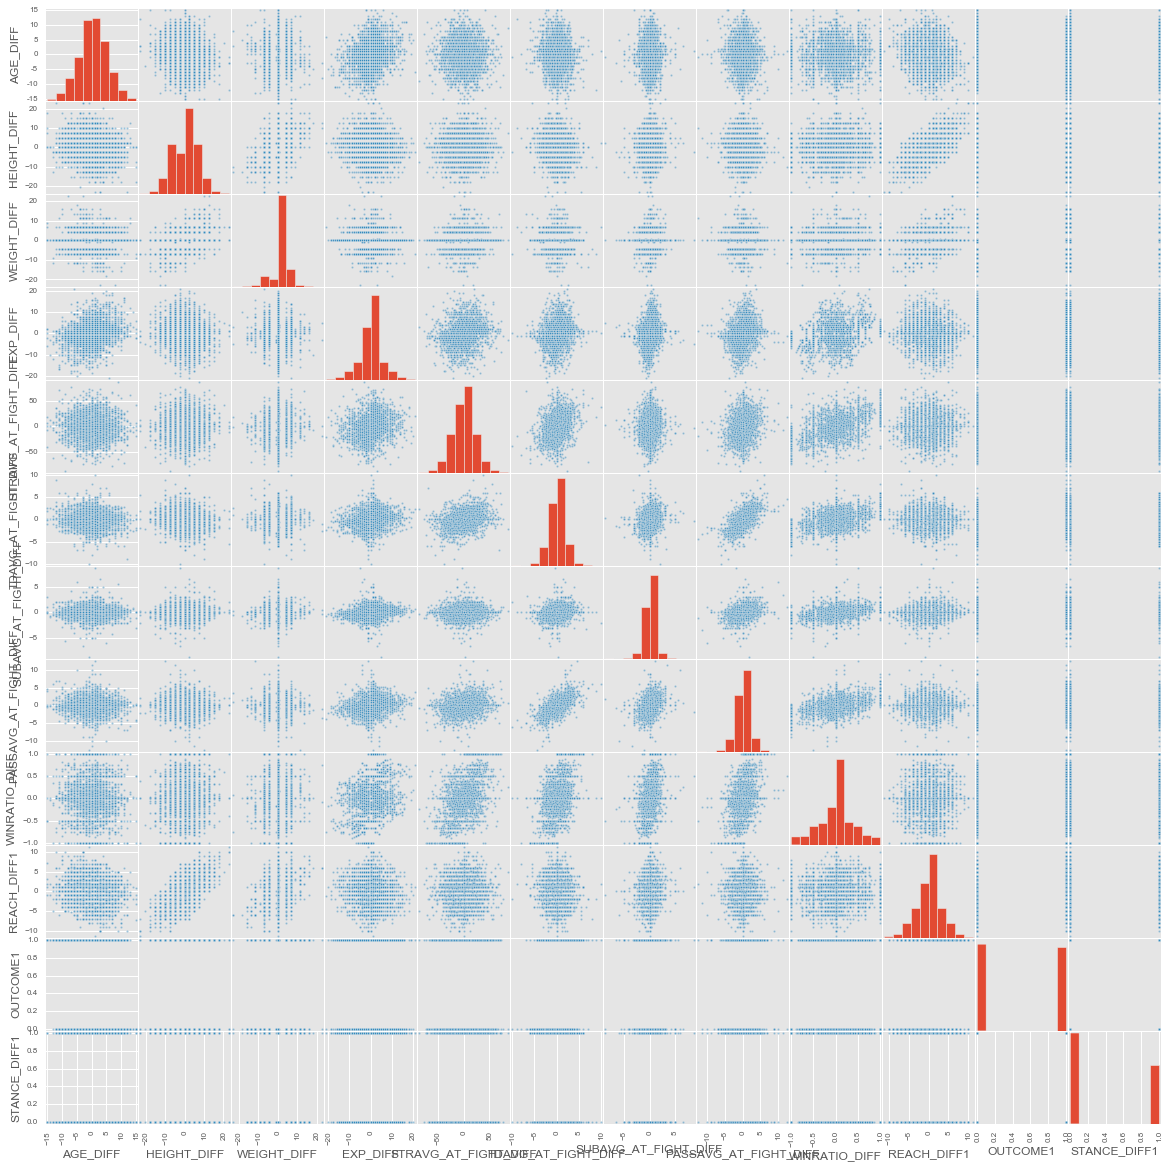

In [23]:
# "MIDDLE" Weightclasses
CORRSUB = UFC1b[(UFC1b.WEIGHT_CLASS.isin(['Lightweight','Welterweight']))]
print CORRSUB.describe()
pd.scatter_matrix(CORRSUB, figsize=(20,20))
print CORRSUB.corr().OUTCOME1
CORRSUB.corr()

          AGE_DIFF  HEIGHT_DIFF  WEIGHT_DIFF    EXP_DIFF  \
count  2282.000000  2282.000000  2282.000000  2282.00000   
mean      0.000000     0.000000     0.000000     0.00000   
std       5.421311     6.904346     7.815892     5.66839   
min     -17.000000   -33.020000   -36.287360   -28.00000   
25%      -4.000000    -5.080000    -0.907184    -3.00000   
50%       0.000000     0.000000     0.000000     0.00000   
75%       4.000000     5.080000     0.907184     3.00000   
max      17.000000    33.020000    36.287360    28.00000   

       STRAVG_AT_FIGHT_DIFF  TDAVG_AT_FIGHT_DIFF  SUBAVG_AT_FIGHT_DIFF  \
count           2282.000000          2282.000000           2282.000000   
mean               0.000000             0.000000              0.000000   
std               20.835352             1.450009              0.813796   
min             -106.800000            -8.000000             -7.800000   
25%              -12.156250            -0.666667             -0.333333   
50%            

,AGE_DIFF,HEIGHT_DIFF,WEIGHT_DIFF,EXP_DIFF,STRAVG_AT_FIGHT_DIFF,TDAVG_AT_FIGHT_DIFF,SUBAVG_AT_FIGHT_DIFF,PASSAVG_AT_FIGHT_DIFF,WINRATIO_DIFF,REACH_DIFF1,OUTCOME1,STANCE_DIFF1
AGE_DIFF,1.000000,-0.214971,-0.033424,0.227490,-0.007523,-0.031038,-0.053257,-0.036801,-0.008390,-0.191387,-0.090560,0.00000
HEIGHT_DIFF,-0.214971,1.000000,0.237611,0.052467,0.097382,-0.083636,0.057295,-0.004419,0.057260,0.710184,0.069343,0.00000
WEIGHT_DIFF,-0.033424,0.237611,1.000000,0.039822,-0.046307,0.002455,-0.022517,-0.064471,-0.043463,0.259647,0.032156,0.00000
EXP_DIFF,0.227490,0.052467,0.039822,1.000000,0.118334,0.107457,0.099267,0.021186,0.224532,-0.001874,0.024128,0.00000
STRAVG_AT_FIGHT_DIFF,-0.007523,0.097382,-0.046307,0.118334,1.000000,0.223855,0.046258,0.243476,0.425791,0.048267,0.117309,0.00000
TDAVG_AT_FIGHT_DIFF,-0.031038,-0.083636,0.002455,0.107457,0.223855,1.000000,0.188590,0.583181,0.229514,-0.037762,0.104000,0.00000
SUBAVG_AT_FIGHT_DIFF,-0.053257,0.057295,-0.022517,0.099267,0.046258,0.188590,1.000000,0.386046,0.274322,0.097094,0.012962,0.00000
PASSAVG_AT_FIGHT_DIFF,-0.036801,-0.004419,-0.064471,0.021186,0.243476,0.583181,0.386046,1.000000,0.294531,0.013431,0.101888,0.00000
WINRATIO_DIFF,-0.008390,0.057260,-0.043463,0.224532,0.425791,0.229514,0.274322,0.294531,1.000000,0.074272,0.145512,0.00000
REACH_DIFF1,-0.191387,0.710184,0.259647,-0.001874,0.048267,-0.037762,0.097094,0.013431,0.074272,1.000000,0.117798,0.00000


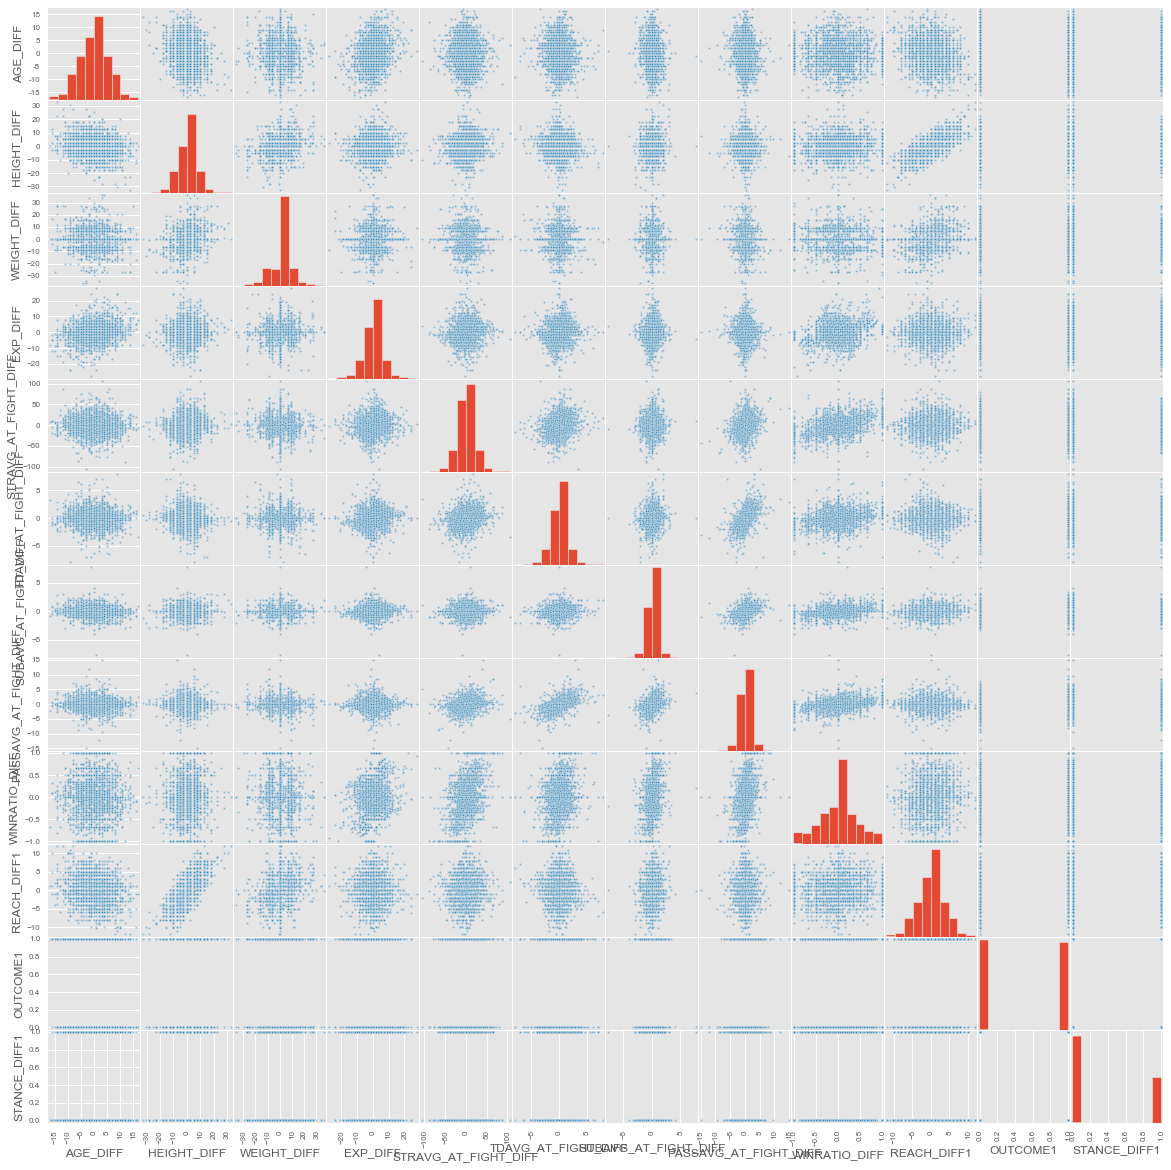

In [24]:
# "HEAVY" Weightclasses
CORRSUB = UFC1b[(UFC1b.WEIGHT_CLASS.isin(['Middleweight','Light Heavyweight','Heavyweight']))]
print CORRSUB.describe()
pd.scatter_matrix(CORRSUB, figsize=(20,20))
print CORRSUB.corr().OUTCOME1
CORRSUB.corr()

0.594095940959
[[89 51]
 [59 72]]
[('AGE_DIFF', -0.073305000851927177), ('HEIGHT_DIFF', -0.051046198853355949), ('WEIGHT_DIFF', 0.046981814051890815), ('EXP_DIFF', 0.014158670922502614), ('STRAVG_AT_FIGHT_DIFF', 0.0060257230388630137), ('TDAVG_AT_FIGHT_DIFF', 0.014824688986818251), ('SUBAVG_AT_FIGHT_DIFF', -0.025803107488111585), ('PASSAVG_AT_FIGHT_DIFF', 0.047231600990130157), ('WINRATIO_DIFF', 0.026639099302425025), ('REACH_DIFF1', 0.015691427107705897), ('STANCE_DIFF1', -0.089126862900542295)]
[ 0.57798165  0.55045872  0.59633028  0.50458716  0.59633028  0.66055046
  0.56481481  0.53703704  0.64485981  0.59813084]
0.583108103817
[ 0.71186643]


/Users/LouisTsang/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


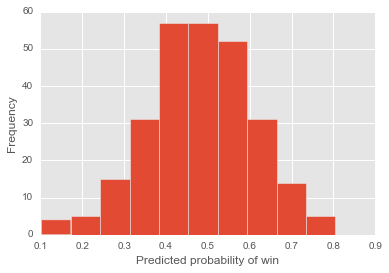

In [12]:
# ** LIGHT Weightclass Model **
CLASS = 'Flyweight','Bantamweight','Featherweight',
feature_cols = UFC1b[(UFC1b.WEIGHT_CLASS.isin(CLASS))].iloc[:,[1,2,3,4,5,6,7,8,9,10,12]]
X = feature_cols
y = UFC1b[(UFC1b.WEIGHT_CLASS.isin(CLASS))].OUTCOME1

#split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

#Confusion Matrix
prds = logreg.predict(X)
print metrics.confusion_matrix(y_test, y_pred_class)

#plot the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of win')
plt.ylabel('Frequency')

#print the coeff
print zip(feature_cols, logreg.coef_[0])
#convert log-odds to odds
#zip(feature_cols, np.exp(logreg.coef_[0]))

#Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
#evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

#Test case predicted probabilities
print logreg.predict_proba([-10,5,2,10,6,5,2,0,5,2,0])[:, 1]

0.597826086957
[[201 123]
 [136 184]]
[('AGE_DIFF', -0.063637392068433205), ('HEIGHT_DIFF', 0.013392533604878179), ('WEIGHT_DIFF', -0.010408469490455969), ('EXP_DIFF', 0.039549382560567954), ('STRAVG_AT_FIGHT_DIFF', 0.0036993899291405639), ('TDAVG_AT_FIGHT_DIFF', 0.14911553607465849), ('SUBAVG_AT_FIGHT_DIFF', 0.019050551618733789), ('PASSAVG_AT_FIGHT_DIFF', 0.018402204207328243), ('WINRATIO_DIFF', 0.16957186691475748), ('REACH_DIFF1', 0.027256013159269041), ('STANCE_DIFF1', -0.054562444306213986)]
[ 0.58527132  0.58139535  0.58527132  0.4379845   0.58914729  0.55426357
  0.59922179  0.55642023  0.6614786   0.64980545]
0.580025940337
[ 0.94118857]


/Users/LouisTsang/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


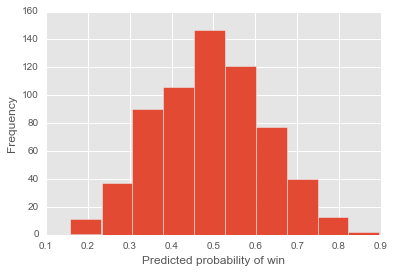

In [62]:
# ** MIDDLE Weightclass Model **
CLASS = 'Lightweight','Welterweight',
feature_cols = UFC1b[(UFC1b.WEIGHT_CLASS.isin(CLASS))].iloc[:,[1,2,3,4,5,6,7,8,9,10,12]]
X = feature_cols
y = UFC1b[(UFC1b.WEIGHT_CLASS.isin(CLASS))].OUTCOME1

#split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

#Confusion Matrix
prds = logreg.predict(X)
print metrics.confusion_matrix(y_test, y_pred_class)

#predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
#plot the predicted probabilities
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of win')
plt.ylabel('Frequency')

#print the coeff
print zip(feature_cols, logreg.coef_[0])
#convert log-odds to odds
#zip(feature_cols, np.exp(logreg.coef_[0]))

#Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
#evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

#Test case
print logreg.predict_proba([-10,5,2,10,6,5,2,0,5,2,0])[:, 1]

0.604203152364
[[186  98]
 [128 159]]
[('AGE_DIFF', -0.024364084708117031), ('HEIGHT_DIFF', -0.010702449034354336), ('WEIGHT_DIFF', 0.0010992572734044327), ('EXP_DIFF', 0.0054137523770621141), ('STRAVG_AT_FIGHT_DIFF', 0.0037563701381218384), ('TDAVG_AT_FIGHT_DIFF', 0.0797220657572629), ('SUBAVG_AT_FIGHT_DIFF', -0.19020891590101796), ('PASSAVG_AT_FIGHT_DIFF', 0.067568128755951959), ('WINRATIO_DIFF', 0.47204501765497642), ('REACH_DIFF1', 0.074537917112305563), ('STANCE_DIFF1', 0.039518495200800759)]
[ 0.55021834  0.54148472  0.58951965  0.56768559  0.58515284  0.52192982
  0.57894737  0.54625551  0.65638767  0.49339207]
0.563097357064
[ 0.93946792]


/Users/LouisTsang/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


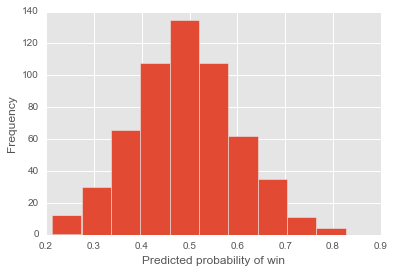

In [63]:
# ** HEAVY Weightclass Model **
CLASS = 'Middleweight','Light Heavyweight','Heavyweight',
feature_cols = UFC1b[(UFC1b.WEIGHT_CLASS.isin(CLASS))].iloc[:,[1,2,3,4,5,6,7,8,9,10,12]]
X = feature_cols
y = UFC1b[(UFC1b.WEIGHT_CLASS.isin(CLASS))].OUTCOME1

#split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

#Confusion Matrix
prds = logreg.predict(X)
print metrics.confusion_matrix(y_test, y_pred_class)

#predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
#plot the predicted probabilities
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of win')
plt.ylabel('Frequency')

#print the coeff
print zip(feature_cols, logreg.coef_[0])
#convert log-odds to odds
#zip(feature_cols, np.exp(logreg.coef_[0]))

#Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
#evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

#Test case
print logreg.predict_proba([-10,5,2,10,6,5,2,0,5,2,0])[:, 1]